In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import pandas_datareader.data as web
import os
import matplotlib.pyplot as plt

In [2]:
start_year = 2014
end_year = 2016
start = pd.datetime(start_year, 1, 1)
end = pd.datetime(end_year, 12, 31)
code = 'AJL.AX'
code_dat = web.DataReader(code, 'yahoo', start, end)

In [5]:
n_days = 30

In [7]:
rolling = code_dat.rolling(window=30)

In [10]:
high_ndays = rolling['High'].max().dropna()

In [19]:
low_ndays = rolling['Low'].min().dropna()

In [20]:
close_price = code_dat.loc[:, 'Close'].iloc[n_days-1:]

In [21]:
will = - 100 * (high_ndays - close_price) / (high_ndays - low_ndays)

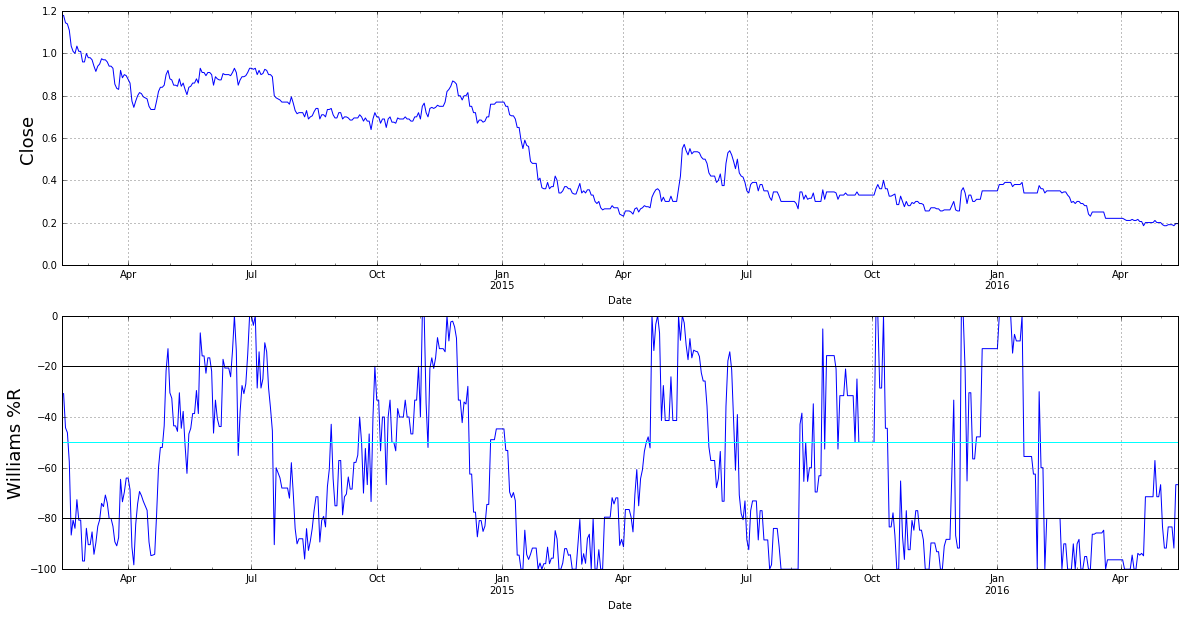

In [22]:
plt.figure(figsize=(20, 10))
ax_up = plt.subplot(211)
close_price.plot(ax=ax_up)
ax_up.set_ylabel('Close', fontsize=18)
plt.grid()
ax_down = plt.subplot(212)
will.plot(ax=ax_down)
ax_down.set_ylabel('Williams %R', fontsize=18)
plt.ylim((-100, 0))
x_lim = ax_down.get_xlim()
plt.plot(x_lim, (-50, -50), color='cyan')
plt.plot(x_lim, (-20, -20), color='k')
plt.plot(x_lim, (-80, -80), color='k')
plt.grid()